# Make a dataframe with cities

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.tabular import *

In [3]:
cd ~/Documents/Work/Programming/fastai/courses/course-v3/

/Users/Ds2007laptop/Documents/Work/Programming/fastai/courses/course-v3


In [4]:
ls

LICENSE                 docs/                   nbs/
README.md               files/                  tools/
azure-pipelines.yml     floyd.yml
data_GPU/               floyd_requirements.txt


In [5]:
ls data_GPU/city_streets/

dallas/            melbourne/         new-york/          san-francisco/
dallas.txt         melbourne.txt      new-york.txt       san-francisco.txt


In [6]:
# define variable: paths to images
fpaths = list(Path('./data_GPU/city_streets/').rglob('*.jpg')); fpaths[:5]

[PosixPath('data_GPU/city_streets/melbourne/00000010.jpg'),
 PosixPath('data_GPU/city_streets/melbourne/00000004.jpg'),
 PosixPath('data_GPU/city_streets/melbourne/00000005.jpg'),
 PosixPath('data_GPU/city_streets/melbourne/00000011.jpg'),
 PosixPath('data_GPU/city_streets/melbourne/00000007.jpg')]

In [7]:
# put fpaths in a Series
fpath_s = pd.Series(fpaths, name='fpaths'); fpath_s.head()

0    data_GPU/city_streets/melbourne/00000010.jpg
1    data_GPU/city_streets/melbourne/00000004.jpg
2    data_GPU/city_streets/melbourne/00000005.jpg
3    data_GPU/city_streets/melbourne/00000011.jpg
4    data_GPU/city_streets/melbourne/00000007.jpg
Name: fpaths, dtype: object

In [8]:
# define variable filenames as a list
fnames = []

# populate the list with file names
# for each path in file paths
for path in fpaths:
    fname = path.name           # call the .name function on path
    fnames.append(fname)        # add each fname to the list fnames
    
fnames[:5]    

['00000010.jpg',
 '00000004.jpg',
 '00000005.jpg',
 '00000011.jpg',
 '00000007.jpg']

In [9]:
# create Series with fnames
fname_s = pd.Series(fnames, name='fnames'); fname_s.head()

0    00000010.jpg
1    00000004.jpg
2    00000005.jpg
3    00000011.jpg
4    00000007.jpg
Name: fnames, dtype: object

In [10]:
# define variable for parent 
fparents = []

for path in fpaths:
    fparent = path.parent
    fparents.append(fparent)
    
fparents[:5]

[PosixPath('data_GPU/city_streets/melbourne'),
 PosixPath('data_GPU/city_streets/melbourne'),
 PosixPath('data_GPU/city_streets/melbourne'),
 PosixPath('data_GPU/city_streets/melbourne'),
 PosixPath('data_GPU/city_streets/melbourne')]

In [11]:
# make a Series
fparent_s = pd.Series(fparents, name='fparents'); fparent_s.head()

0    data_GPU/city_streets/melbourne
1    data_GPU/city_streets/melbourne
2    data_GPU/city_streets/melbourne
3    data_GPU/city_streets/melbourne
4    data_GPU/city_streets/melbourne
Name: fparents, dtype: object

In [12]:
# get filename before extension
fstems = []

for path in fpaths:
    fstem = path.stem
    fstems.append(fstem)
    
fstems[:5]

['00000010', '00000004', '00000005', '00000011', '00000007']

In [13]:
# concatonate two Series to make a dataframe
df = pd.concat([fpath_s, fparent_s, fname_s], axis=1); df.head()

,fpaths,fparents,fnames
0,data_GPU/city_streets/melbourne/00000010.jpg,data_GPU/city_streets/melbourne,00000010.jpg
1,data_GPU/city_streets/melbourne/00000004.jpg,data_GPU/city_streets/melbourne,00000004.jpg
2,data_GPU/city_streets/melbourne/00000005.jpg,data_GPU/city_streets/melbourne,00000005.jpg
3,data_GPU/city_streets/melbourne/00000011.jpg,data_GPU/city_streets/melbourne,00000011.jpg
4,data_GPU/city_streets/melbourne/00000007.jpg,data_GPU/city_streets/melbourne,00000007.jpg


In [14]:
df['fparents_str'] = df['fparents'].apply(lambda x: str(x)); df.head()

,fpaths,fparents,fnames,fparents_str
0,data_GPU/city_streets/melbourne/00000010.jpg,data_GPU/city_streets/melbourne,00000010.jpg,data_GPU/city_streets/melbourne
1,data_GPU/city_streets/melbourne/00000004.jpg,data_GPU/city_streets/melbourne,00000004.jpg,data_GPU/city_streets/melbourne
2,data_GPU/city_streets/melbourne/00000005.jpg,data_GPU/city_streets/melbourne,00000005.jpg,data_GPU/city_streets/melbourne
3,data_GPU/city_streets/melbourne/00000011.jpg,data_GPU/city_streets/melbourne,00000011.jpg,data_GPU/city_streets/melbourne
4,data_GPU/city_streets/melbourne/00000007.jpg,data_GPU/city_streets/melbourne,00000007.jpg,data_GPU/city_streets/melbourne


In [15]:
df['class_label'] = df['fparents_str'].str.split("/", expand=True)[2]; df.head()

,fpaths,fparents,fnames,fparents_str,class_label
0,data_GPU/city_streets/melbourne/00000010.jpg,data_GPU/city_streets/melbourne,00000010.jpg,data_GPU/city_streets/melbourne,melbourne
1,data_GPU/city_streets/melbourne/00000004.jpg,data_GPU/city_streets/melbourne,00000004.jpg,data_GPU/city_streets/melbourne,melbourne
2,data_GPU/city_streets/melbourne/00000005.jpg,data_GPU/city_streets/melbourne,00000005.jpg,data_GPU/city_streets/melbourne,melbourne
3,data_GPU/city_streets/melbourne/00000011.jpg,data_GPU/city_streets/melbourne,00000011.jpg,data_GPU/city_streets/melbourne,melbourne
4,data_GPU/city_streets/melbourne/00000007.jpg,data_GPU/city_streets/melbourne,00000007.jpg,data_GPU/city_streets/melbourne,melbourne


## Make data = ImageItemList.from_df()

In [16]:
doc(ImageItemList.from_df)

In [44]:
# create path & folder to put output into
path = Path('.')

In [18]:
pwd

'/Users/Ds2007laptop/Documents/Work/Programming/fastai/courses/course-v3'

In [19]:
ls data_GPU/city_streets

dallas/            melbourne/         new-york/          san-francisco/
dallas.txt         melbourne.txt      new-york.txt       san-francisco.txt


In [45]:
path.ls()

[PosixPath('data_GPU'),
 PosixPath('tools'),
 PosixPath('LICENSE'),
 PosixPath('nbs'),
 PosixPath('docs'),
 PosixPath('azure-pipelines.yml'),
 PosixPath('README.md'),
 PosixPath('floyd.yml'),
 PosixPath('.gitignore'),
 PosixPath('.gitattributes'),
 PosixPath('files'),
 PosixPath('.git'),
 PosixPath('.gitconfig'),
 PosixPath('.gitignore~'),
 PosixPath('floyd_requirements.txt')]

In [21]:
df.head()

,fpaths,fparents,fnames,fparents_str,class_label
0,data_GPU/city_streets/melbourne/00000010.jpg,data_GPU/city_streets/melbourne,00000010.jpg,data_GPU/city_streets/melbourne,melbourne
1,data_GPU/city_streets/melbourne/00000004.jpg,data_GPU/city_streets/melbourne,00000004.jpg,data_GPU/city_streets/melbourne,melbourne
2,data_GPU/city_streets/melbourne/00000005.jpg,data_GPU/city_streets/melbourne,00000005.jpg,data_GPU/city_streets/melbourne,melbourne
3,data_GPU/city_streets/melbourne/00000011.jpg,data_GPU/city_streets/melbourne,00000011.jpg,data_GPU/city_streets/melbourne,melbourne
4,data_GPU/city_streets/melbourne/00000007.jpg,data_GPU/city_streets/melbourne,00000007.jpg,data_GPU/city_streets/melbourne,melbourne


In [22]:
# path/cols needs to lead to the image file 
# assign the path variable to the path that leads to the folder data/GPU 
# both `path = '.'` and `path = Path('.')` work :)
path = '.'

In [23]:
data = ImageItemList.from_df(path=path, df=df, cols='fpaths')

In [24]:
data

ImageItemList (89 items)
[Image (3, 523, 800), Image (3, 467, 700), Image (3, 467, 700), Image (3, 957, 1300), Image (3, 349, 620)]...
Path: .

# .split data into training and the validation sets

In [25]:
data = (ImageItemList.from_df(df=df, path=path, cols='fpaths')
                     .random_split_by_pct(valid_pct=0.2, seed=1))

In [26]:
data

ItemLists;
Train: ImageItemList (72 items)
[Image (3, 523, 800), Image (3, 467, 700), Image (3, 467, 700), Image (3, 957, 1300), Image (3, 349, 620)]...
Path: .;
Valid: ImageItemList (17 items)
[Image (3, 464, 700), Image (3, 1406, 2100), Image (3, 169, 225), Image (3, 720, 1280), Image (3, 1182, 2048)]...
Path: .;
Test: None

# Add .label_from_df

In [27]:
data = (ImageItemList.from_df(df=df, path=path, cols='fpaths')
                     .random_split_by_pct(valid_pct=0.2, seed=1)
                     .label_from_df(cols='class_label'))

In [28]:
data

LabelLists;
Train: LabelList
y: CategoryList (72 items)
[Category melbourne, Category melbourne, Category melbourne, Category melbourne, Category melbourne]...
Path: .
x: ImageItemList (72 items)
[Image (3, 523, 800), Image (3, 467, 700), Image (3, 467, 700), Image (3, 957, 1300), Image (3, 349, 620)]...
Path: .;
Valid: LabelList
y: CategoryList (17 items)
[Category dallas, Category san-francisco, Category dallas, Category dallas, Category san-francisco]...
Path: .
x: ImageItemList (17 items)
[Image (3, 464, 700), Image (3, 1406, 2100), Image (3, 169, 225), Image (3, 720, 1280), Image (3, 1182, 2048)]...
Path: .;
Test: None

# make databunch

In [29]:
data = (ImageItemList.from_df(df=df, path=path, cols='fpaths')
                     .random_split_by_pct(valid_pct=0.2, seed=1)
                     .label_from_df(cols='class_label')
                     .databunch())

In [30]:
data

ImageDataBunch;
Train: LabelList
y: CategoryList (72 items)
[Category melbourne, Category melbourne, Category melbourne, Category melbourne, Category melbourne]...
Path: .
x: ImageItemList (72 items)
[Image (3, 523, 800), Image (3, 467, 700), Image (3, 467, 700), Image (3, 957, 1300), Image (3, 349, 620)]...
Path: .;
Valid: LabelList
y: CategoryList (17 items)
[Category dallas, Category san-francisco, Category dallas, Category dallas, Category san-francisco]...
Path: .
x: ImageItemList (17 items)
[Image (3, 464, 700), Image (3, 1406, 2100), Image (3, 169, 225), Image (3, 720, 1280), Image (3, 1182, 2048)]...
Path: .;
Test: None

In [47]:
# add a random seed
np.random.seed(10)
data = (ImageItemList.from_df(df=df, path=path, cols='fpaths')
                     .random_split_by_pct(valid_pct=0.2, seed=1)
                     .label_from_df(cols='class_label')
                     .databunch())

In [48]:
# nothing in data changed with a random seed
data

ImageDataBunch;
Train: LabelList
y: CategoryList (72 items)
[Category melbourne, Category melbourne, Category melbourne, Category melbourne, Category melbourne]...
Path: .
x: ImageItemList (72 items)
[Image (3, 523, 800), Image (3, 467, 700), Image (3, 467, 700), Image (3, 957, 1300), Image (3, 349, 620)]...
Path: .;
Valid: LabelList
y: CategoryList (17 items)
[Category dallas, Category san-francisco, Category dallas, Category dallas, Category san-francisco]...
Path: .
x: ImageItemList (17 items)
[Image (3, 464, 700), Image (3, 1406, 2100), Image (3, 169, 225), Image (3, 720, 1280), Image (3, 1182, 2048)]...
Path: .;
Test: None

# see portions of dataset

In [31]:
data.train_ds

LabelList
y: CategoryList (72 items)
[Category melbourne, Category melbourne, Category melbourne, Category melbourne, Category melbourne]...
Path: .
x: ImageItemList (72 items)
[Image (3, 523, 800), Image (3, 467, 700), Image (3, 467, 700), Image (3, 957, 1300), Image (3, 349, 620)]...
Path: .

In [32]:
data.valid_ds

LabelList
y: CategoryList (17 items)
[Category dallas, Category san-francisco, Category dallas, Category dallas, Category san-francisco]...
Path: .
x: ImageItemList (17 items)
[Image (3, 464, 700), Image (3, 1406, 2100), Image (3, 169, 225), Image (3, 720, 1280), Image (3, 1182, 2048)]...
Path: .

In [33]:
data.valid_ds[0]

(Image (3, 464, 700), Category dallas)

In [49]:
data.classes

['dallas', 'melbourne', 'new-york', 'san-francisco']

In [55]:
data.c

4

In [56]:
len(data.train_ds), len(data.valid_ds)

(72, 17)

# Set them all to the same size within transform()

In [96]:
tfms = get_transforms(do_flip=False, 
                      flip_vert=False, 
                      max_rotate=5., 
                      max_zoom=1.1, 
                      max_lighting=0.2, 
                      max_warp=0.2, 
                      p_affine=0.75, 
                      p_lighting=0.75)

In [97]:
# # When can I use these?
# resize_method=ResizeMethod.PAD,
# do_crop=False, # add padding on the sides that need to get bigger
# padding_mode='reflection')

In [98]:
np.random.seed(10)
data = (ImageItemList.from_df(df=df, path=path, cols='fpaths')
                     .random_split_by_pct(valid_pct=0.2, seed=1)
                     .label_from_df(cols='class_label')
                     .transform(tfms, size=128) # set size of img
                     .databunch())

In [ ]:
# I probably need to move .random_split_by_pct to below .transform()

In [99]:
data

ImageDataBunch;
Train: LabelList
y: CategoryList (72 items)
[Category melbourne, Category melbourne, Category melbourne, Category melbourne, Category melbourne]...
Path: .
x: ImageItemList (72 items)
[Image (3, 523, 800), Image (3, 467, 700), Image (3, 467, 700), Image (3, 957, 1300), Image (3, 349, 620)]...
Path: .;
Valid: LabelList
y: CategoryList (17 items)
[Category dallas, Category san-francisco, Category dallas, Category dallas, Category san-francisco]...
Path: .
x: ImageItemList (17 items)
[Image (3, 464, 700), Image (3, 1406, 2100), Image (3, 169, 225), Image (3, 720, 1280), Image (3, 1182, 2048)]...
Path: .;
Test: None

In [100]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dallas', 'melbourne', 'new-york', 'san-francisco'], 4, 72, 17)

# View data

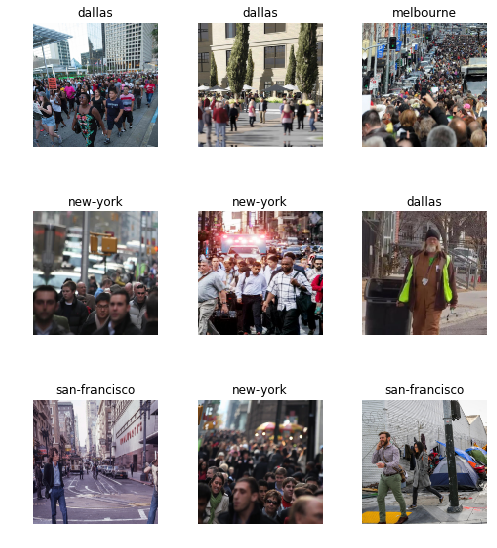

In [101]:
data.show_batch(rows=3, figsize=(7,8), hide_axis=True)

# Train model

In [102]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [103]:
learn

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (72 items)
[Category melbourne, Category melbourne, Category melbourne, Category melbourne, Category melbourne]...
Path: .
x: ImageItemList (72 items)
[Image (3, 523, 800), Image (3, 467, 700), Image (3, 467, 700), Image (3, 957, 1300), Image (3, 349, 620)]...
Path: .;
Valid: LabelList
y: CategoryList (17 items)
[Category dallas, Category san-francisco, Category dallas, Category dallas, Category san-francisco]...
Path: .
x: ImageItemList (17 items)
[Image (3, 464, 700), Image (3, 1406, 2100), Image (3, 169, 225), Image (3, 720, 1280), Image (3, 1182, 2048)]...
Path: .;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0):

In [104]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.976492,1.467516,0.882353
2,1.749141,1.419527,0.705882
3,1.598621,1.464246,0.647059
4,1.485243,1.420291,0.647059


In [ ]:
# does this also work & give same results with default?
learn.fit_one_cycle(learn=Learner, cyc_len=4, max_lr=slice(None, 0.003, None), moms=(0.95, 0.85), div_factor=25.0, pct_start=0.3, wd=None, callbacks=None)

In [ ]:
# does this also work & give same results with default?
learn.fit_one_cycle(learn=Learner, cyc_len=4, max_lr=slice(None, 3e-3, None), moms=(0.95, 0.85), div_factor=25.0, pct_start=0.3, wd=None, callbacks=None)

In [105]:
# creates a folder called 'models' in ~/.../course-v3
# creates a file called 'stage-1.pth' in models folder
# file is 90MB
learn.save('stage-1')

In [106]:
# must do before .lr_find()
learn.unfreeze()

In [ ]:
# Can I change the default for .lr_find from 50, 40 is enough? 

In [107]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


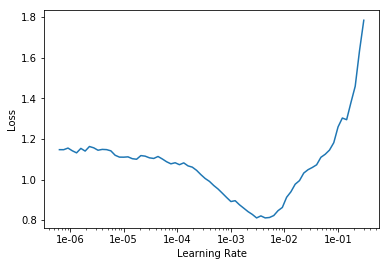

In [108]:
learn.recorder.plot()

In [110]:
# choose a learning rate
learn.fit_one_cycle(4, max_lr=slice(2e-4,2e-3))

epoch,train_loss,valid_loss,error_rate
1,0.924914,1.489586,0.764706
2,0.800758,1.679204,0.647059
3,0.676808,2.031533,0.764706
4,0.650766,1.990003,0.823529


In [111]:
learn.save('stage-2e4-2e3')

In [112]:
# choose a learning rate
learn.fit_one_cycle(4, max_lr=slice(1e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.360538,1.849619,0.764706
2,0.416886,1.798071,0.764706
3,0.501564,1.840658,0.764706
4,0.449991,1.852812,0.823529


In [113]:
learn.save('stage-1e5-3e4')

In [ ]:
# next time try less epochs

# Interpret results

In [ ]:
learn.load('stage-2')

In [40]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

# Clean up